In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.5,0,0,0,0,Female
1,1,12.6,5.6,0,0,0,0,Female
2,0,13.0,6.5,1,1,1,1,Male
3,1,12.5,6.9,1,0,1,1,Male
4,1,13.7,6.1,0,0,1,0,Female
...,...,...,...,...,...,...,...,...
2745,1,15.2,5.9,1,1,0,1,Male
2746,1,12.8,6.4,0,1,1,0,Male
2747,0,14.5,6.6,1,1,1,1,Male
2748,1,14.9,6.7,1,1,1,1,Male


In [4]:
df_train.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,0.866545,13.178473,5.943055,0.497455,0.514182,0.502182,0.509818
std,0.340127,1.100793,0.540476,0.500084,0.499890,0.500086,0.499995
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,14.000000,6.300000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  2750 non-null   int64  
 1   forehead_width_cm          2750 non-null   float64
 2   forehead_height_cm         2750 non-null   float64
 3   nose_wide                  2750 non-null   int64  
 4   nose_long                  2750 non-null   int64  
 5   lips_thin                  2750 non-null   int64  
 6   distance_nose_to_lip_long  2750 non-null   int64  
 7   gender                     2750 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 172.0+ KB


In [6]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

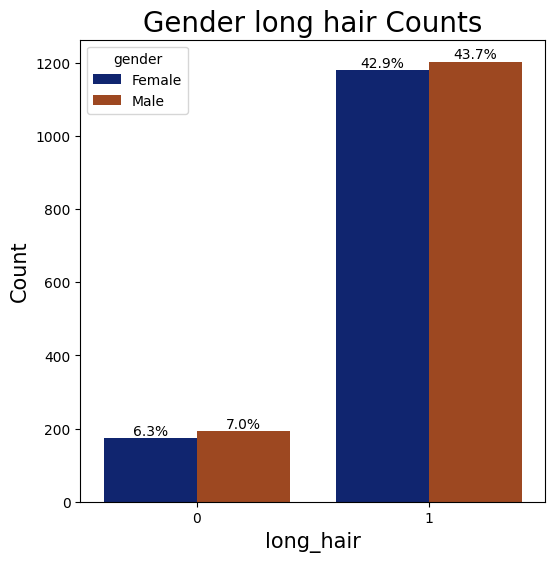

In [7]:
x = df_train['long_hair']
hue = df_train['gender']
count_plot(x, df_train, "Gender long hair Counts", "long_hair", 'Count', 6,6, palette='dark', hue=hue)

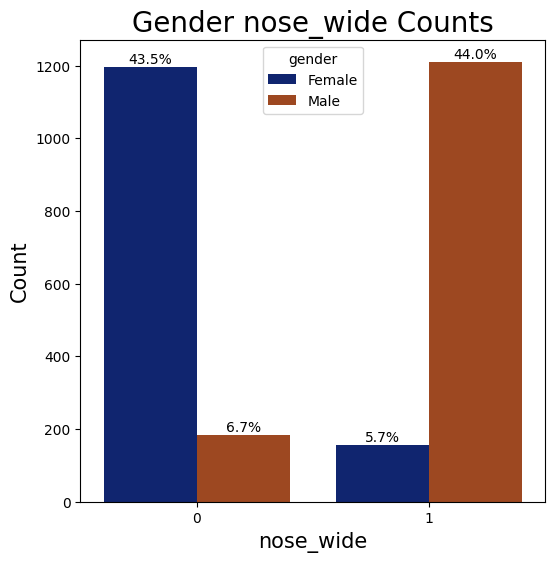

In [8]:
x = df_train['nose_wide']
hue = df_train['gender']
count_plot(x, df_train, "Gender nose_wide Counts", "nose_wide", 'Count', 6,6, palette='dark', hue=hue)

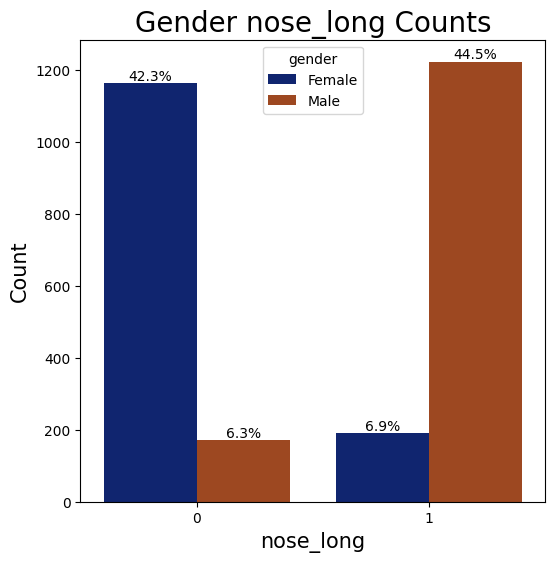

In [9]:
x = df_train['nose_long']
hue = df_train['gender']
count_plot(x, df_train, "Gender nose_long Counts", "nose_long", 'Count', 6,6, palette='dark', hue=hue)

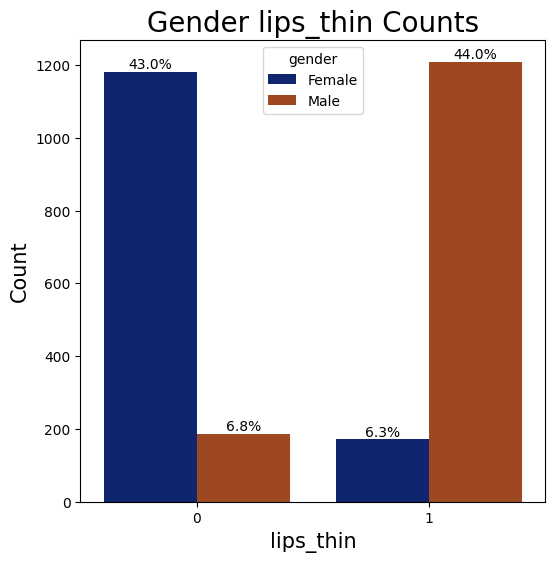

In [10]:
x = df_train['lips_thin']
hue = df_train['gender']
count_plot(x, df_train, "Gender lips_thin Counts", "lips_thin", 'Count', 6,6, palette='dark', hue=hue)

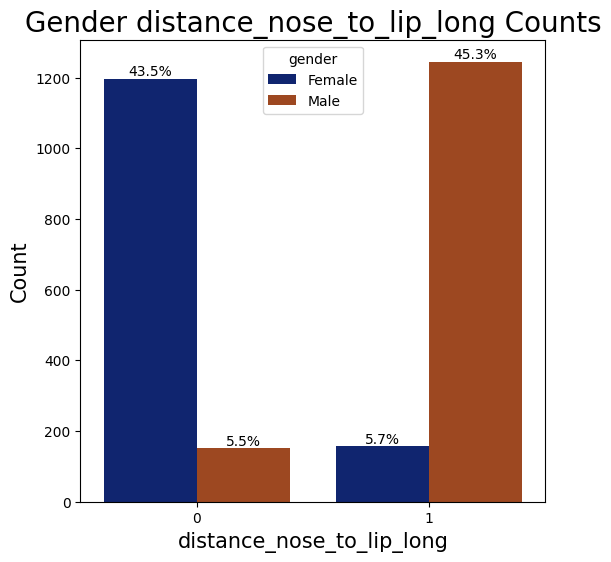

In [11]:
x = df_train['distance_nose_to_lip_long']
hue = df_train['gender']
count_plot(x, df_train, "Gender distance_nose_to_lip_long Counts", "distance_nose_to_lip_long", 'Count', 6,6, palette='dark', hue=hue)

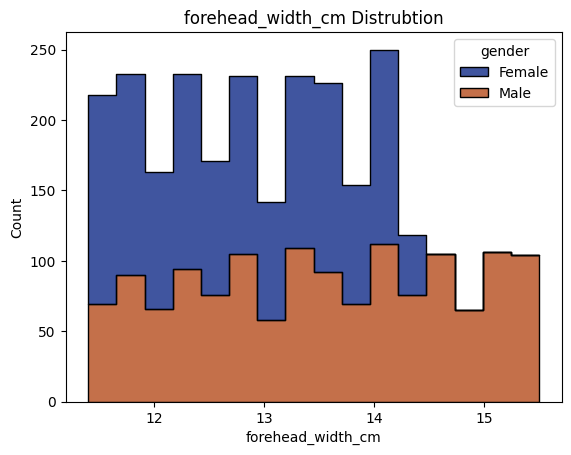

In [12]:
sns.histplot(data = df_train, x='forehead_width_cm', hue='gender', palette='dark', multiple="stack", element="step")
plt.title("forehead_width_cm Distrubtion")
plt.show()

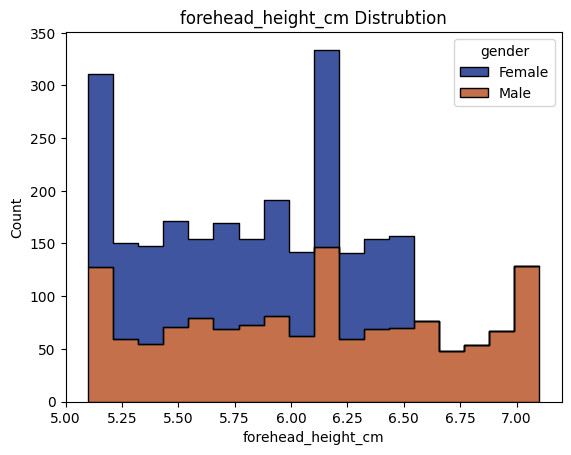

In [13]:
sns.histplot(data = df_train, x='forehead_height_cm', hue='gender', palette='dark', multiple="stack", element="step")
plt.title("forehead_height_cm Distrubtion")
plt.show()

In [14]:
df_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,13.6,6.0,1,1,1,1,Male
1,1,12.0,6.1,0,0,0,0,Female
2,1,12.7,6.8,1,1,1,1,Male
3,0,12.0,5.1,0,0,0,0,Female
4,1,13.4,5.5,0,1,0,0,Female
...,...,...,...,...,...,...,...,...
2246,1,13.7,5.5,1,1,1,0,Male
2247,1,13.7,7.1,1,1,1,1,Male
2248,1,13.3,5.1,0,0,0,0,Female
2249,1,14.6,6.5,1,1,0,1,Male


In [15]:
df_train['one'] = 1
df_test['one'] = 1

In [16]:
def is_male (df):
    l = []
    for gen in df['gender']:
        if gen == 'Male':
            l.append(1)
        else:
            l.append(0) 
    df['is_male'] = l
    return df
    

In [17]:
is_male(df_train)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,one,is_male
0,1,11.8,6.5,0,0,0,0,Female,1,0
1,1,12.6,5.6,0,0,0,0,Female,1,0
2,0,13.0,6.5,1,1,1,1,Male,1,1
3,1,12.5,6.9,1,0,1,1,Male,1,1
4,1,13.7,6.1,0,0,1,0,Female,1,0
...,...,...,...,...,...,...,...,...,...,...
2745,1,15.2,5.9,1,1,0,1,Male,1,1
2746,1,12.8,6.4,0,1,1,0,Male,1,1
2747,0,14.5,6.6,1,1,1,1,Male,1,1
2748,1,14.9,6.7,1,1,1,1,Male,1,1


In [18]:
is_male(df_test)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,one,is_male
0,1,13.6,6.0,1,1,1,1,Male,1,1
1,1,12.0,6.1,0,0,0,0,Female,1,0
2,1,12.7,6.8,1,1,1,1,Male,1,1
3,0,12.0,5.1,0,0,0,0,Female,1,0
4,1,13.4,5.5,0,1,0,0,Female,1,0
...,...,...,...,...,...,...,...,...,...,...
2246,1,13.7,5.5,1,1,1,0,Male,1,1
2247,1,13.7,7.1,1,1,1,1,Male,1,1
2248,1,13.3,5.1,0,0,0,0,Female,1,0
2249,1,14.6,6.5,1,1,0,1,Male,1,1


In [19]:
X_train = df_train[['one','long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]
y_train = df_train['is_male']

In [20]:
X_test = df_test[['one','long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]
y_test = df_test['is_male']

In [21]:
logistic_model = LogisticRegression(fit_intercept=False)
logistic_model.fit(X_train,y_train)


LogisticRegression(fit_intercept=False)

In [22]:
y_predict = logistic_model.predict(X_test)

In [23]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1141
           1       0.95      0.95      0.95      1110

    accuracy                           0.95      2251
   macro avg       0.95      0.95      0.95      2251
weighted avg       0.95      0.95      0.95      2251



In [24]:
from sklearn.tree import DecisionTreeClassifier


In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1153
           1       0.96      0.97      0.97      1098

    accuracy                           0.97      2251
   macro avg       0.97      0.97      0.97      2251
weighted avg       0.97      0.97      0.97      2251



In [27]:
#ID3 model with pruning
pruning_model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
pruning_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
y_pred_prun = pruning_model.predict(X_test)
print(classification_report(y_pred_prun,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1151
           1       0.95      0.96      0.96      1100

    accuracy                           0.96      2251
   macro avg       0.96      0.96      0.96      2251
weighted avg       0.96      0.96      0.96      2251



In [29]:
submit_file = pd.read_csv('test_predict.csv')
submit_file.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,13.6,6.0,1,1,1,1,Male
1,1,12.0,6.1,0,0,0,0,Female
2,1,12.7,6.8,1,1,1,1,Male
3,0,12.0,5.1,0,0,0,0,Female
4,1,13.4,5.5,0,1,0,0,Female


In [30]:
submit_file.drop('gender', axis=1,inplace=True)


In [31]:
submit_file['gender'] = y_pred


In [32]:
g = []
for x in y_pred:
    if x == 0:
        g.append('Female')
    else:
        g.append('Male')
submit_file['gender'] = g


In [33]:
submit_file.to_csv("Submission.csv")